In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.loadtxt('/home/meetspar/Untitled Folder/Data_Set/21-08 Heat Transfer exp.csv', delimiter=',', dtype='str', skiprows=1)

In [3]:
data = data.astype(float)

In [4]:
X = data[:,0]
y = data[:,1]

m = X.size

X = np.stack([np.ones(m), X], axis=1)
theta = np.zeros(2)

In [5]:
def normalize(X, y):
    mu_x  = np.mean(X[:,1])
    sig_x = np.std(X[:,1])
    X[:,1] = (X[:,1]-mu_x)/sig_x
    
    mu_y  = np.mean(y)
    sig_y = np.std(y)
    y = (y-mu_y)/sig_y
    
    print(sig_x, sig_y, mu_x, mu_y)
    
    return X, y

In [6]:
X, y = normalize(X, y)

291.547594742265 8.471939647798584 500.0 47.29900990099011


In [7]:
def plot_data(X, y):
    plt.plot(X[:, 1], y, '.')

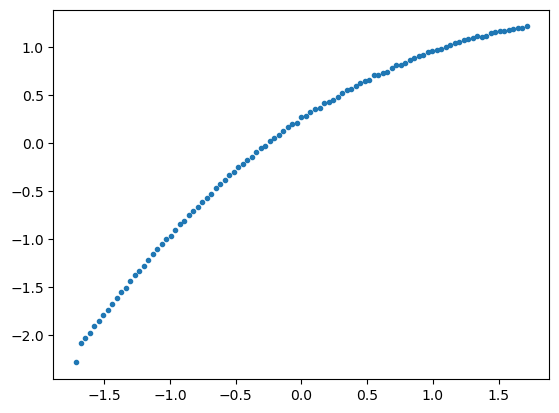

In [8]:
plot_data(X, y)

In [9]:
X

array([[ 1.        , -1.71498585],
       [ 1.        , -1.68068613],
       [ 1.        , -1.64638642],
       [ 1.        , -1.6120867 ],
       [ 1.        , -1.57778698],
       [ 1.        , -1.54348727],
       [ 1.        , -1.50918755],
       [ 1.        , -1.47488783],
       [ 1.        , -1.44058812],
       [ 1.        , -1.4062884 ],
       [ 1.        , -1.37198868],
       [ 1.        , -1.33768896],
       [ 1.        , -1.30338925],
       [ 1.        , -1.26908953],
       [ 1.        , -1.23478981],
       [ 1.        , -1.2004901 ],
       [ 1.        , -1.16619038],
       [ 1.        , -1.13189066],
       [ 1.        , -1.09759094],
       [ 1.        , -1.06329123],
       [ 1.        , -1.02899151],
       [ 1.        , -0.99469179],
       [ 1.        , -0.96039208],
       [ 1.        , -0.92609236],
       [ 1.        , -0.89179264],
       [ 1.        , -0.85749293],
       [ 1.        , -0.82319321],
       [ 1.        , -0.78889349],
       [ 1.        ,

In [10]:
def w(z, t):
    return np.exp(-((z+1.71498585)/t)**2/2)

In [11]:
w(X[:, 1], 0.9)

array([1.00000000e+00, 9.99274047e-01, 9.97099350e-01, 9.93485365e-01,
       9.88447783e-01, 9.82008407e-01, 9.74195000e-01, 9.65041085e-01,
       9.54585704e-01, 9.42873144e-01, 9.29952620e-01, 9.15877932e-01,
       9.00707095e-01, 8.84501939e-01, 8.67327689e-01, 8.49252531e-01,
       8.30347160e-01, 8.10684325e-01, 7.90338364e-01, 7.69384739e-01,
       7.47899578e-01, 7.25959220e-01, 7.03639771e-01, 6.81016679e-01,
       6.58164320e-01, 6.35155609e-01, 6.12061633e-01, 5.88951311e-01,
       5.65891075e-01, 5.42944594e-01, 5.20172512e-01, 4.97632229e-01,
       4.75377714e-01, 4.53459340e-01, 4.31923767e-01, 4.10813843e-01,
       3.90168544e-01, 3.70022943e-01, 3.50408207e-01, 3.31351623e-01,
       3.12876649e-01, 2.95002990e-01, 2.77746695e-01, 2.61120278e-01,
       2.45132850e-01, 2.29790275e-01, 2.15095336e-01, 2.01047908e-01,
       1.87645148e-01, 1.74881688e-01, 1.62749832e-01, 1.51239760e-01,
       1.40339727e-01, 1.30036266e-01, 1.20314389e-01, 1.11157780e-01,
      

In [12]:
def cost(X, y, theta):
    W = w(X[:,1], 0.5)
    D = np.diag(W)
    h = np.dot(X, theta)-y
    
    return (0.5/m)*np.trace(D*h*h)

In [13]:
def gradient(X, y, theta, alpha, n_iters):
    W = w(X[:,1], 0.5)
    j = []
    
    for i in range(n_iters):
        h = np.dot(X, theta)-y
        theta = theta-alpha*np.dot(X.T, W*h)/m
        j.append(cost(X, y, theta))
    return theta, j

In [14]:
theta_f, j_f = gradient(X, y, theta, 1.2, 1000)

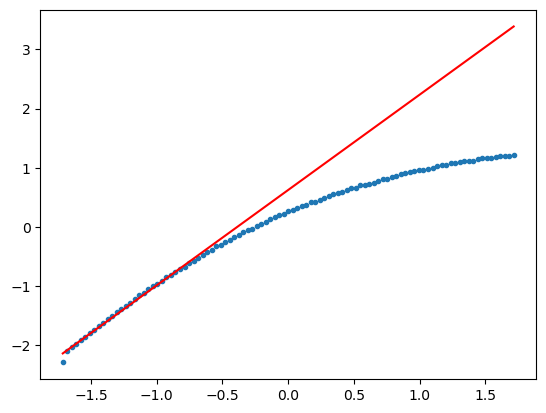

In [15]:
plot_data(X, y)
plt.plot(X[:,1],np.dot(X, theta_f), linestyle='-', color='r')

In [16]:
x = np.array([1, -0.68598])
np.dot(x, theta_f)

-0.48011525807022615

In [17]:
theta_f

array([0.62433399, 1.61003127])

In [316]:
def computeCost(X, y, theta):
    m = y.size
    J = 0
    b = np.dot(X, theta)-y
    J = np.sum(b**2)
    
    return (0.5/m)*J

In [317]:
b = np.dot(X, theta)-y

In [318]:
(0.5/m)*np.sum(b**2)

0.49999999999999994

In [319]:
y

array([-2.28979557, -2.08913314, -2.03011478, -1.98290009, -1.91207806,
       -1.8530597 , -1.79404133, -1.74682664, -1.67600461, -1.61698625,
       -1.55796789, -1.5107532 , -1.43993116, -1.3809128 , -1.33369811,
       -1.28648342, -1.21566139, -1.15664302, -1.10942834, -1.05040997,
       -1.00319528, -0.96778427, -0.9087659 , -0.84974754, -0.81433653,
       -0.75531816, -0.70810347, -0.67269246, -0.6136741 , -0.57826308,
       -0.53104839, -0.47203003, -0.42481534, -0.38940432, -0.33038596,
       -0.30677861, -0.24776025, -0.22415291, -0.17693822, -0.1415272 ,
       -0.09431251, -0.04709782, -0.03529415,  0.02372421,  0.04733156,
        0.08274257,  0.12995726,  0.16536828,  0.2007793 ,  0.21258297,
        0.27160133,  0.28340501,  0.31881602,  0.35422704,  0.36603071,
        0.4132454 ,  0.42504907,  0.44865642,  0.48406744,  0.51947845,
        0.55488947,  0.56669314,  0.59030049,  0.6257115 ,  0.64931885,
        0.66112252,  0.70833721,  0.70833721,  0.73194456,  0.74